****
<a id='lesson-2'></a>
# Module: Logistic Map

Prepared by Dr. Prabhakar Bhimalapuram, for "Computing in Sciences" course at Internationational Institute of Information Technology, Hyderabad
****




## Map:
Map is a mathematical construct that takes an object and returns another object of same type. Usually, the map is iterated multiple times to test for reaching a 'constant' value i.e. steady state

Example: the operation of a map $f$ may written as: <br>
  $x_1=f(x_0)$ <br>
where the map $f$ transform the input $x_0$ to its new value $x_1$.


# Concept: Phase plot of a map, and relation to stability of fixed point

Lets consider a simple linear map: $x_{n+1} = f(x_n)$ with $f(x) = m x $ . Now cleary $x=0$ is a fixed point. We will be trying to understand the `stability` of this map about the fixed point $x=0$. Let us consider the following cases for the map $x_{n+1}=f(x_n) = m x_n$:
1. $ |m| < 1 \implies -1 < m < 1$ : clearly $ |x_{n+1}| < |x_n|$ i..e. after the iteration, the point moves closer to the fixed point.  `Stable fixed point`
2. $ |m| > 1 \implies (m>1) \lor (m<-1)$: clearly $ |x_{n+1}| < |x_n|$ i.e. after iteration, the point moves father away from the fixed point `unstable fixed point`
3. $m >0$: clearly $ x_{n+1} $ and  $x_n$ remain on the same side of the fixed point `monotonic behaviour`
3. $m < 0$: clearly $x_{n+1}$ and $x_n$ differ in sign, i.e. after iteration the point jumps to other side of the fixed point. `osciallatory behaviour`

We looked at a linear map because we can Taylor expand any continious function as a linear function in the near neighbourhood of the fixed point, and by the above analysis, the behaviour near the fixed point thus depends on the slope of the map function $f(x)$ at the fixed point!


# Task-0: Graphical Analysis of Linear Map.

1. Linear map has $x_{n+1}=f(x_n)$ with $f(x) = mx$ where $m \in \mathcal{R}$ is a constant parameter.
2. First plot $x=y$ line and then plot $x_{n}$ vs $x_{n+1}$. Such a plot is known as Phase Plot. See the below following point on how to specifically plot it.
3. Specific methodology of plotting Phase Plot is typically favored to demostrate features of the map. Start with point $(x_0,0)$ on x-axis, then (a) draw a vertical line from $(x_n,x_n)$  with $n=0$ to point $(x_n,x_{n+1})$; (b) next step is to draw a horizontal from line to $(x_n,x_{n+1})$ to $(x_{n+1},x_{n+1})$. (c) Repeat the steps (a) and (b) incrementing $n$ by 1.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt

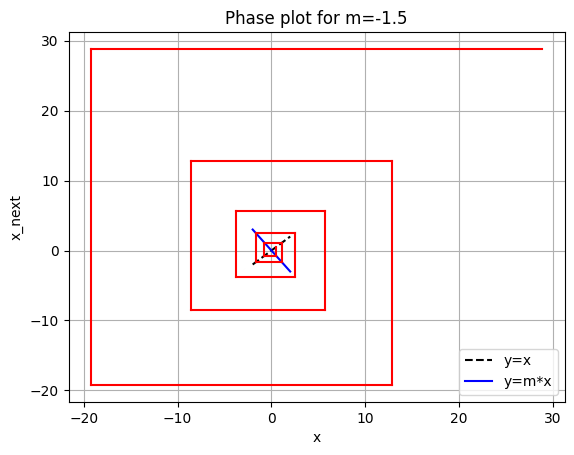

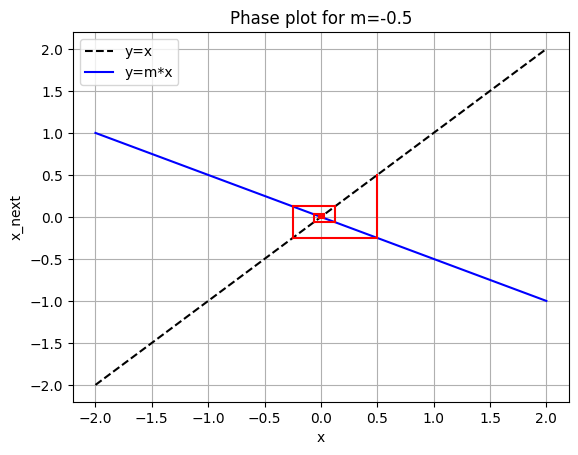

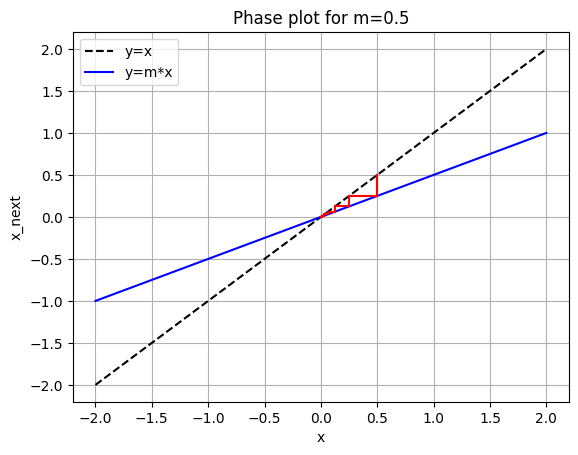

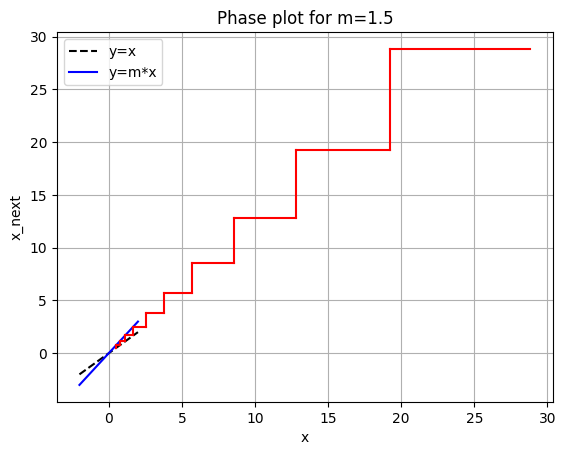

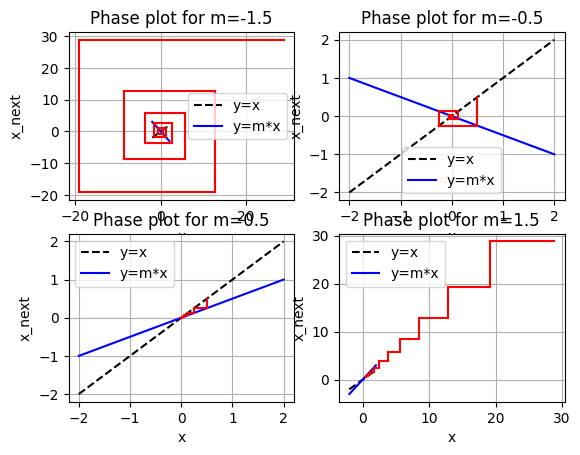

In [2]:
def iterate(x, m):
    return m*x
def phasePlot(x0, m, n):
    x = np.linspace(-2, 2, n)

    
    plt.plot(x, x, 'k--', label='y=x')
    plt.plot(x, iterate(x, m), 'b', label='y=m*x')
    xN = x0
    for i in range(n):
        xNext = iterate(xN, m)
        plt.plot([xN, xN], [xN, xNext], 'r')
        plt.plot([xN, xNext], [xNext, xNext], 'r')
        xN = xNext
    plt.grid(True)
    plt.title(f'Phase plot for m={m}')
    plt.xlabel('x')
    plt.ylabel('x_next')
    plt.legend()
phasePlot(0.5, -1.5, 10)
plt.show()
phasePlot(0.5, -0.5, 10)
plt.show()
phasePlot(0.5, 0.5, 10)
plt.show()
phasePlot(0.5, 1.5, 10)
plt.show()

plt.subplot(2,2,1)
phasePlot(0.5, -1.5, 10)
plt.subplot(2,2,2)
phasePlot(0.5, -0.5, 10)
plt.subplot(2,2,3)
phasePlot(0.5, 0.5, 10)
plt.subplot(2,2,4)
phasePlot(0.5, 1.5, 10)





## Logistical map
Logistic map is a quadratic map; i.e. $f(x)$ is a quadratic ploynomial.
It shows a particularly interesting phenomena of 'deterministic chaos' i.e. a deterministic map showing apparently random behaviour.  Logistic map has a single parameter, named $\alpha$, and is given by: <br>
$f(x)=\alpha x(1-x)$<br>
When $0\le \alpha \le 4$, the map takes an input $0\le x \le 1$ to give an output in the same range. For a particular value of the parameter $\alpha$, we want to find the behaviour of the map. For such systems, plot of $x_{n}$ vs $x_{n+1}$ is called phase plot and is a important tool for visualising and analysing such systems.

We will explore this in this tutorial using phase plots.

You can find good detail on Logistic Map at: https://en.wikipedia.org/wiki/Logistic_map

## Task-1: Logistal Map: $x_{n+1} = f(x_n)$ with $f(x) = \alpha x (1-x)$
Write a function that will take as input the following and output one or more of the tasks listed:
1. parameter value $\alpha$
1. starting value for $x$
1. number of iterations to run

Tasks:
1. Task is to plot the $n$ vs. $x_n$, where $x_n=f(x_{n-1})$ and $x_0=x$.
1. For a fixed $\alpha$ and do the above plot for various $0\le x_0 \le 1$.
1. Repeat above steps for the following values of $\alpha$: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5
1. Comment


In [3]:
def lm(x,alpha):
    '''lm(x,alpha) find the value of the map at postion x and parameter value alpha'''
    return alpha*x*(1-x)


def lm_ncomp(x,alpha,n_iter):
    '''return the value of n_iterations of logistic map for given value of alpha'''
    result = x
    for i in range(n_iter):
        result = lm(result, alpha)
    return result


def lm_seq(x0,alpha,n_iter):
    '''lm_seq(x0,alpha,n_iter): return a list of n_iter+1 iterates of the
    map starting from x0 with paramter value alpha'''
    seq = [x0]
    for i in range(n_iter):
        seq.append(lm(seq[-1], alpha))
    return seq


In [4]:
def lm_plot(x0,alpha,n_iter):
    '''lm_plot(x0,alpha,n_iter): return the plot of sequence of n_iter
    length starting from x0 with parameter alpha for the logistic map'''
    x_nSeq = lm_seq(x0, alpha, n_iter)
    plt.plot(np.linspace(0,n_iter,num=n_iter+1),x_nSeq,"b.", label=f"alpha={alpha}, x={x0}")
    # plt.axis([0, n_iter, 0, 1])
    plt.xlabel("n")
    plt.ylabel("x_n")
    plt.title("")
    plt.legend()
    # plt.show()
    



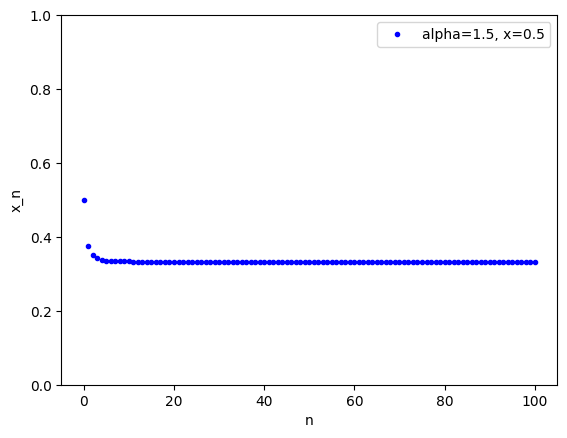

In [5]:
# x = np.linspace(0, 1, num=11)
# alphaArr = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5])
# for alpha in alphaArr:
#     for i in x:
lm_plot(0.5, 1.5, 100)
plt.ylim(0, 1)
plt.show()
        

So that we can see behaviour for a range of $\alpha$ values we will use `matplotlib.pyplot.figure` object to have multiple plots in the same figure

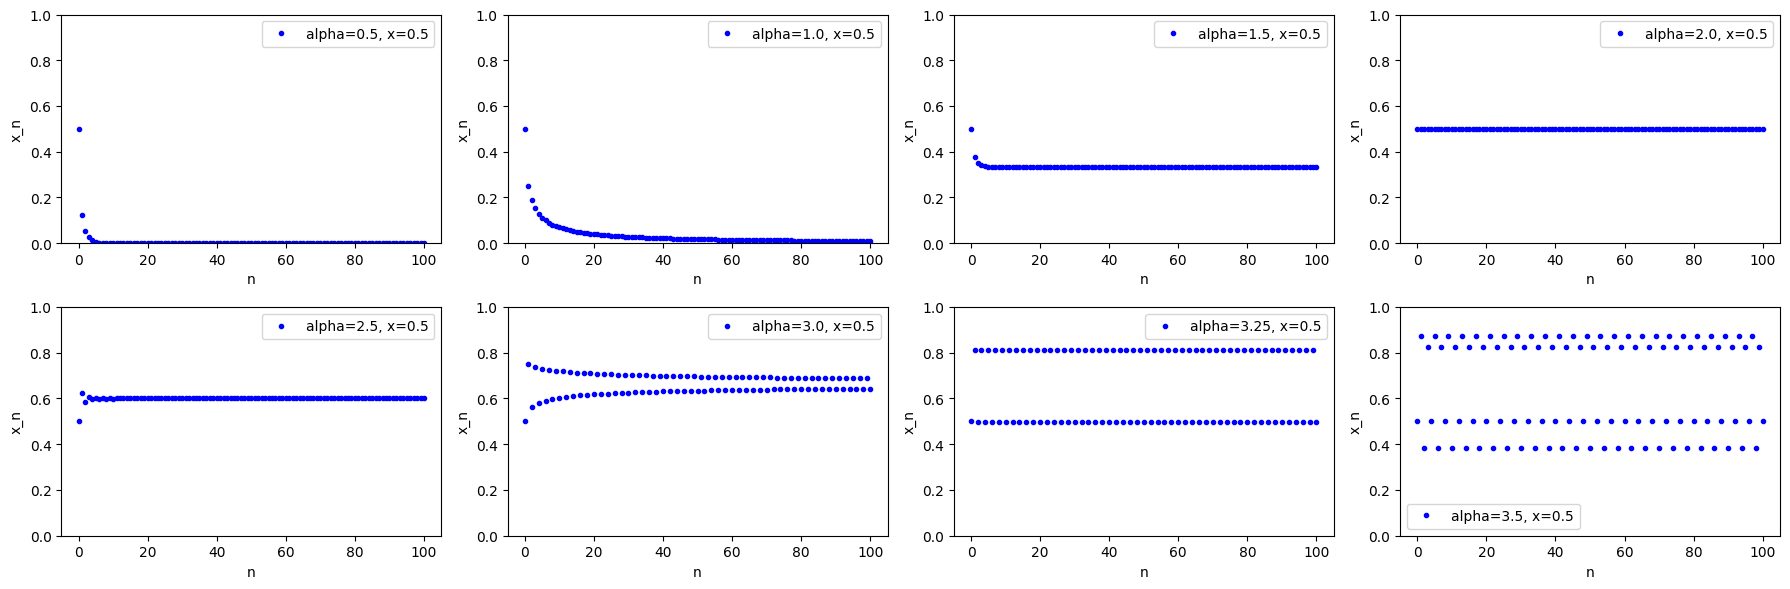

In [6]:
plt.figure(figsize=(18,6)) # total figure size is 18 inches by 6 inches
# fig, axes = plt.subplots(2, 4, figsize=(18, 6))
# axes = axes.flatten() 
x0=0.5
n_iter = 100
av = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5] # list of alpha values
for i in range(1,9):
    plt.subplot(2,4,i) # subplot i, in the figure grid 2x4, starting from 1 upto 8
    lm_plot(0.5,av[i-1],n_iter)
    plt.ylim(0, 1)
# for i in range(8):
#     lm_plot(x0, av[i], n_iter)
plt.tight_layout()
# plt.show()

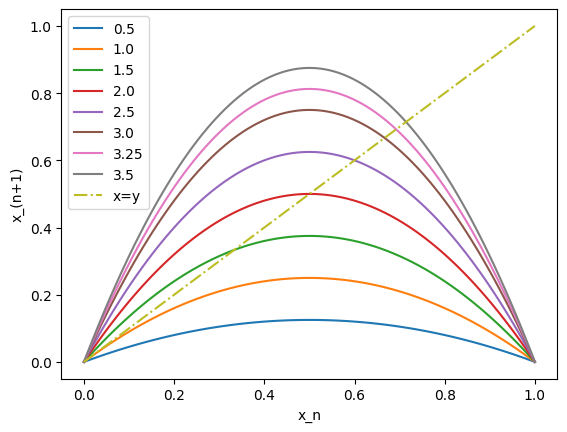

In [7]:
xv = np.linspace(0,1,100)
for a in av:
    plt.plot(xv,lm(xv,a),label=str(a))
plt.plot([0,1],[0,1],'-.',label='x=y')
plt.xlabel('x_n')
plt.ylabel('x_(n+1)')
plt.legend()

1. When $\alpha \le 1 $, we see $x_n = x_{n+1}$ only for one value $x_n = 0$! Also note the behavior of the slope of the map (i.e. $df/dx$) as $\alpha$ increases. This slope starts with zero value and then monotonically increases to $1$ when $\alpha=1$, and continues to increase with increasing $\alpha$.
2. When $\alpha > 1$, we see $x_n = x_{n+1}$ for two values $x_n=0$ and  a $\alpha$ dependent value. (Calculate this fixed point)
3. Interestingly, as $\alpha$ is increases, the slope of the curve at this **new** fixed point is monotonically decreasing from a postive to zero (at $\alpha=2$) and continues to decrease as $\alpha$ increases. So, at some point, this fixed point **also** becomes unstable!  

In [8]:
# slope of the map f(x) = a * x * (1-x) is  a * (1 - 2*x)
def lm_diff(x,alpha):
    '''derivate of the map w.r.t. x '''
    return alpha*(1-2*x)

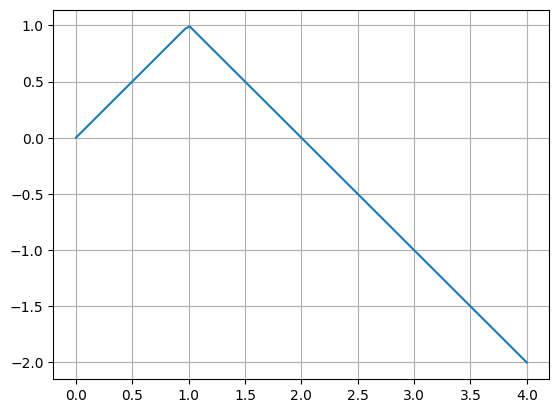

In [9]:
# PLOT SLOPE OF $f(x)$ at the new fixed point
# use newton raphson

# def newtonRaphson(x0, f, df, alpha, tol = 1e-8, max_iter=100):
#     x = x0
#     # xNext = x0-(df(x0, alpha)/f(x0, alpha))
#     # while (xNext != x):
#     #     x = xNext
#     #     xNext = x0-(df(x0, alpha)/f(x0, alpha))
#     # return xNext
#     for _ in range(max_iter):
#         fx = f(x, alpha)
#         dfx = df(x, alpha)
#         # if dfx == 0:
#         #     raise ValueError("Derivative is zero. No convergence.")
#         xNext = x-(dfx/fx)
#         if (abs(xNext-x) < tol):
#             return xNext
#         x=xNext
#     raise ValueError("Newton-Raphson did not converge.")
# seq = []
# diffSeq = []
# for a in av:
#     root = newtonRaphson(0.5, lm, lm_diff, a)
#     seq.append(root)
#     diffSeq.append(lm_diff(root, a))
#     # print(newtonRaphson(0.5, lm, lm_diff, a))
# print(diffSeq)
# plt.plot(av, diffSeq)
# plt.ylabel("df/dx(x*, alpha)")
# plt.xlabel("alpha")


av = np.linspace(0, 4, num=100)
yVals = []
for a in av:
    if a == 0:
        yVals.append(0)
        continue
    yVal = 1-1/a
    if (yVal < 0):
        yVal = 0
    yVals.append(lm_diff(yVal, a)) #or just plot 2-alpha :)

plt.plot(av, yVals)
plt.grid()
plt.show()


Clearly we see that the fixed point become unstable for $\alpha>3.0$. So the map $f^{(1)}$ has no stable fixed points. We have to investigate the fixed points and their stabilty for $f^{(2)}$

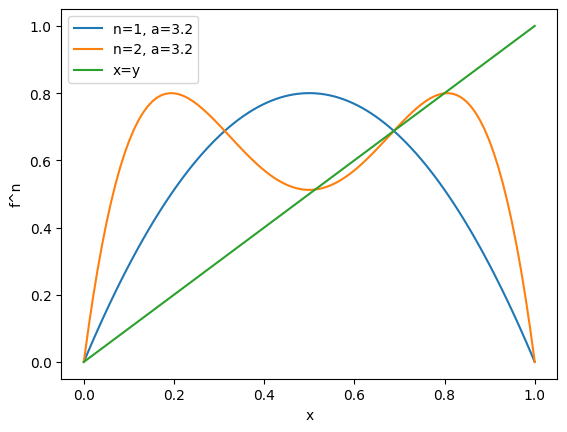

In [10]:
# Plot $f(x)$ and $f(f(x))=f^(2)(x)$ for a>3.0
a=3.2
for n in range(1,3):
    plt.plot(xv,lm_ncomp(xv,a,n),label='n='+str(n)+', a='+str(a))


plt.plot([0,1],[0,1],label='x=y')
plt.xlabel('x')
plt.ylabel('f^n')
plt.legend()

For $\alpha=3.2$, we have already seen that both fixed points of $f$ are unstable. However for the $f^{(2)}(x)$, interestingly there are three fixed points: one of it coincides with the unstable fixed point of $f(x)$, and the other two are `two new stable fixed points`!

This is the mechanism of `bifurcation`, were the unstable fixed point in $f^{(1)}$ splits to give rise to two new stable fixed points of $f^{(2)}(x)$. Now note that fixed points of $f^{(2)}(x)$ is a 2-cycle, i.e. there will be necessarily two solutions $x_1^*$ and $x_2^*$ such that
1. $x_2^* = f^{(2)}(x_1^*)$ and
1. $x_1^* = f^{(2)}(x_2^*)$

In [11]:
def lm_PhasePlot(x0,alpha,n_iter=100,n_comp=1):
    '''For the logistic map, for the parameter value alpha,
    draw phase plot for n_iter steps starting with x0.
    When n_comp >1, phase plot is drawn for f o f o f... (n_iter times) = f^(n)'''
    x = np.linspace(0,1, 100)
    plt.plot(x, x, "k--", label="y=x")
    y = x
    for _ in range(n_comp):
        y = lm(y, alpha)
    plt.plot(x, y, label=f"y=f^{n_comp}(x)")

    #cobweb
    xN = x0
    for _ in range(n_iter):
        xNext = xN
        for _ in range(n_comp):
            xNext = lm(xNext, alpha)
        plt.plot([xN, xN], [xN, xNext], 'r')
        plt.plot([xN, xNext], [xNext, xNext], 'r')
        xN = xNext
    plt.xlabel("x_n")
    plt.ylabel(f"x_n+{n_comp}")
    plt.legend()
    plt.show()



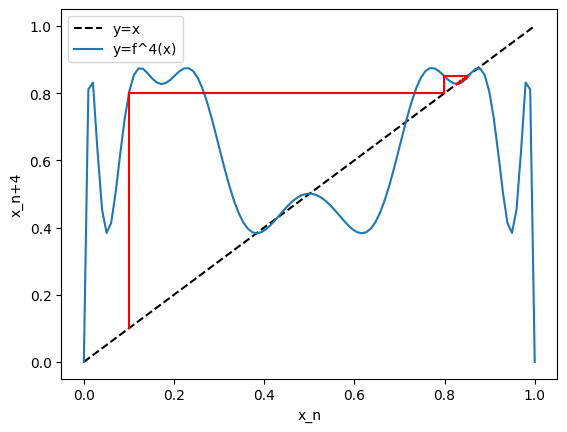

In [12]:
lm_PhasePlot(0.1,3.5,n_comp=4)


## Task-2
1. Write a function that will take values for $x$, $\alpha$ and the number of steps and plot the Phase Plot for these steps. Note fixed points are given by $f(x) = x $
2. Use `scipy.optimizie.fixed_point` to find the fixed points  for given $\alpha$

In [13]:
# find fixed point of the map
import scipy.optimize


def lm_fixedPoint(x0,alpha,n_iter=1):
    '''find the fixed point of n_iter iterations of the logistic map with starting point x0'''
    def iter(x):
        return lm_ncomp(x, alpha, n_iter)
    return scipy.optimize.fixed_point(iter, x0)
    


In [14]:
av_linspace = np.linspace(0,4,100)
fp = []
for a in av_linspace:
    fp.append(lm_fixedPoint(0.5,a))

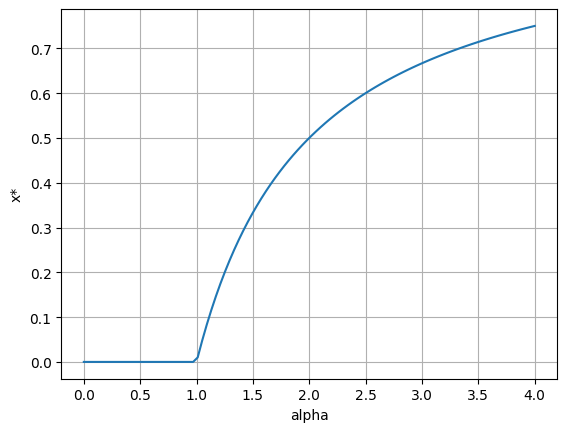

In [15]:
plt.plot(av_linspace,fp)
plt.xlabel('alpha')
plt.ylabel('x*')
plt.grid()
plt.show()

# fp2 = []
# for a in av_linspace:
#     fp.append(lm_fixedPoint(0.5,a))
# plt.plot(av_linspace,fp2)
# plt.xlabel('alpha')
# plt.ylabel('x*')
# plt.grid()
# plt.show()

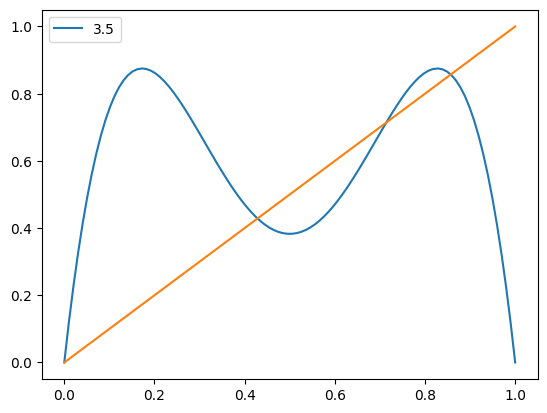

In [16]:
#plot x vs f(f(x))
a=3.5
plt.plot(xv,lm(lm(xv,a),a),label=str(a))
plt.plot(xv,xv)
plt.legend()

In [17]:
alpha=3.5
n_comp=1
xs = scipy.optimize.fixed_point(lm_ncomp,0.5,args=(alpha,n_comp)) # find fixed point using lm_ncomp function

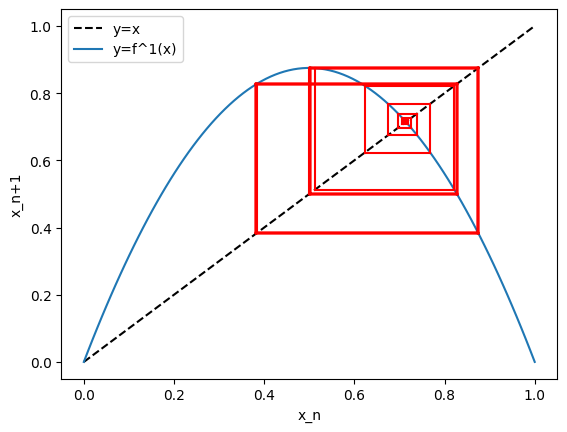

In [18]:
# check stability at that point after a small perturbation
lm_PhasePlot(xs+0.001,alpha)


## Task-3
Write a function, for a particular value of $\alpha$, to determine steady states and cycles (lets denote these values as $x^*(\alpha)$. For this we have to consider $f(x)$, $f(f(x))=f^2(x)$, $f^3(x)$,...,$f^n(x)$ and find fixed points of $f^n(x)$.

### Strategy to solve this task: to find the steady-state or cycle for a given $\alpha$
1. Find root of $f^{(n)}=x$, where $f^{(n)}$ is the $n^{th}$ iteration of the map; i.e. $f^{(3)}(x)=f(f(f(x)))$ using `scipy.optimize.fixed_point`
2. Check the stability of the root
1. If all roots are unstable, then increase n by 1 and goto step 1
1. If even one root is stable, then we have found the steady-state/cycle.

and use `scipy.optimize.fixed_point`



Please note that the derivative of the $f^{(n)}(x)$ w.r.t $x$ can be calculated as follows:

Lets denote $x_0=x$,  and $x_{n+1} = f(x_n)$ for $n \ge 0$. Then $ \frac{d}{dx} f^{(n+1)}(x) = \frac{d }{dx} f(x_n) = \frac{d}{dx_n} f(x_n)\times \frac{d x_n}{dx} = \left[\alpha (1-2 x_{n})\right] \frac{d}{dx} f^{(n)}(x) $; which is a recursive formula for the derivative!

The recursive formula is thus:
 $$\frac{d}{dx} f^{(n)}(x) = f^\prime(x_{n-1})~f^\prime(x_{n-2})~\cdots f^\prime(x_{2})~ f^\prime(x_{1})~f^\prime(x_0) = \prod_{i=0}^{n-1}f^\prime(x_i)$$
 where $x_0=x$ and $x_n=f^{(n)}(x_0)$ and $f^\prime(x)=\alpha (1-2x) $

In [19]:
def lm_deriv(x0,alpha,n_comp=1):
    '''return the value the derivative at x0 of the f o f o f... (n_comp times ) i.e. of f^(n_comp)'''
    seq = lm_seq(x0, alpha, n_comp-1)
    deriv = [lm_diff(x, alpha) for x in seq]
    return (np.prod(deriv))

def lm_getFixedPoints(alpha, n):
    #interpreting n as maxNum of cycles
    x0Arr = np.linspace(0.1, 0.9, 10)
    fixedPoints = []
    for nVal in range(1, n+1):
        flag = False
        for x0 in x0Arr:
            fixedPoint = lm_fixedPoint(x0, alpha, nVal)
            cycle = []
            fxNext = fixedPoint
            for _ in range(nVal):
                cycle.append(fxNext)
                fxNext = lm(fxNext, alpha)
            new = True
            for fp in fixedPoints:
                if len(fp['cycle']) == len(cycle):
                    if all(abs(a - b) < 1e-6 for a, b in zip(fp['cycle'], cycle)):
                        new = False
                        break
            if new:
                deriv = lm_deriv(fixedPoint, alpha, n)
                stability = 'stable' if abs(deriv) < 1 else 'unstable'
                
                fixedPoints.append({
                    'cycle_length': n,
                    'cycle': cycle,
                    'stability': stability,
                    'derivative': deriv
                })
                
                if stability == 'stable':
                    flag = True
        
        if flag:
            break

    return fixedPoints

In [20]:
def lm_deriv(x0,alpha,n_comp=1):
    '''return the value the derivative at x0 of the f o f o f... (n_comp times ) i.e. of f^(n_comp)'''
    seq = lm_seq(x0, alpha, n_comp-1)
    deriv = [lm_diff(x, alpha) for x in seq]
    return (np.prod(deriv))

In [21]:
x0=0.6
alpha=3.5
n_comp=1
l1=lm_seq(x0,alpha,n_comp)
l2=[lm_diff(x,alpha) for x in l1]
print("l1 ",l1)
print("l2 ",l2)
print("derivative= ",np.prod(l2))


l1  [0.6, 0.8400000000000001]
l2  [-0.6999999999999998, -2.380000000000001]
derivative=  1.6660000000000001


In [22]:
print(lm_deriv(x0,alpha,4))

-0.8987274674524215


## Task-4
Plot $\alpha$ vs $x^*(\alpha)$. Comment.

In [23]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
from ipywidgets import interactive, interact, FloatSlider
import ipywidgets as widgets

# def lm_seq(alpha, x0, n):
#     x = [x0]
#     for i in range(n):
#         x.append(alpha * x[-1] * (1 - x[-1]))
#     return x

# Plot function for the animation
def plot_logistic(alpha):
    n_iter = 100
    x0 = 0.5
    x = lm_seq(x0, alpha, n_iter)
    plt.figure(figsize=(8, 4))
    plt.plot(range(n_iter+1), x, marker="o", markersize=3, color="blue", linestyle="-")
    plt.xlabel("Iteration")
    plt.ylabel("Population (x)")
    plt.title(f"Logistic Map for α = {alpha}")
    plt.ylim(0, 1)
    plt.grid()
    plt.show()

# Create interactive widget
alpha_slider = FloatSlider(value=2.5, min=0, max=4, step=0.001, description='α:')
interactive_plot = interactive(plot_logistic, alpha=alpha_slider)
display(interactive_plot)

interactive(children=(FloatSlider(value=2.5, description='α:', max=4.0, step=0.001), Output()), _dom_classes=(…

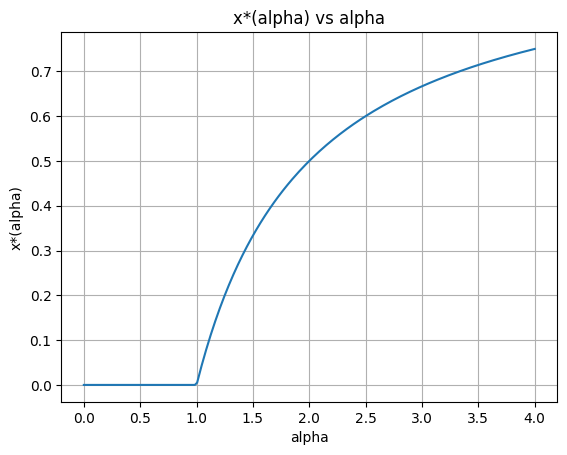

In [25]:
#x*(alpha) vs alpha
av = np.linspace(0, 4, 200)
yVals = []
for a in av:
    if a == 0:
        yVal = 0
        yVals.append(yVal)
        continue
    yVal = 1-1/a
    if (yVal < 0):
        yVal= 0
    yVals.append(yVal)

plt.plot(av, yVals)
plt.title("x*(alpha) vs alpha")
plt.xlabel("alpha")
plt.ylabel("x*(alpha)")
plt.grid(True)
plt.show()
# NOTE: bifurcation diagram is shown as well below the graph

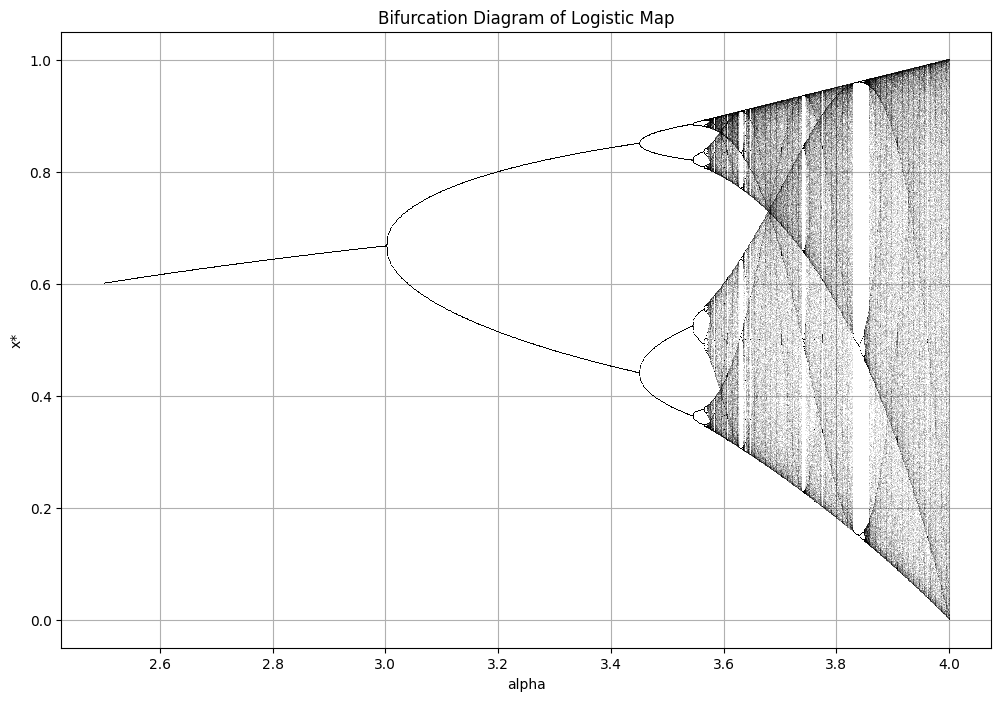

In [26]:
def bifDiagram(alpha_range=(2.5, 4.0), n_points=1000, n_iterations=1000, n_discard=100):
    alphas = np.linspace(alpha_range[0], alpha_range[1], n_points)
    x_values = []
    alpha_values = []
    
    x = 0.5
    
    for alpha in alphas:
        for _ in range(n_discard):
            x = lm(x, alpha)
        
        for _ in range(n_iterations):
            x = lm(x, alpha)
            x_values.append(x)
            alpha_values.append(alpha)
    
    plt.figure(figsize=(12, 8))
    plt.plot(alpha_values, x_values, ',k', alpha=0.1)
    plt.xlabel('alpha')
    plt.ylabel('x*')
    plt.title('Bifurcation Diagram of Logistic Map')
    plt.grid(True)
    return plt
bifDiagram()
plt.show()

# Comment on the plot of $\alpha$ vs $x^*(\alpha)$
1. For $\alpha \le 1$, we see $x^*(\alpha) = 0$.
2. For $1 <\alpha \le 3$, we see $x^*(\alpha) = \frac{\alpha -1}{\alpha}$.
3. For $\alpha > 3$, we see $x^*(\alpha)$ becoming unstable and the system undergoes period doubling bifurcations. Initially we have a stable period-2 cycle.
4. As $\alpha$ increases further from $\alpha \approx 3.449$ to $\alpha \approx 3.544$, these cycles double to period-4, period-8, and so on.
5. At $\alpha \approx 3.56995$, the system reaches the onset of chaos (Feigenbaum point), where the behavior becomes highly sensitive to initial conditions - butterfly effect.
6. For $3.57 \lesssim \alpha < 4$, the system is mostly chaotic, but windows of periodicity still exist (e.g., a stable period-3 cycle appears around $\alpha \approx 3.83$).
7. At $\alpha = 4$, the system is fully chaotic for almost all initial conditions $x_0 \in (0,1)$, with dense, aperiodic trajectories.




## Task-5 - Optional
Find the ratio between two consequtive bifurcations.